Nom: Mamadou Billo Diallo

CodeP:DIAM02120004

DEVOIR: TP2

In [1]:
#Firstly, we import our libraries. For this project, only Pandas and MLxtend are needed.
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpgrowth

1- Préparation des données pour le forage des règles d’association :

a- (Sur 15 points) Discrétiser les variables continues (en intervalles ou en catégories)



j'ai utilisé la base de donnée bank de 10%  pour faire mes premiers test puis j'ai décidé de prendre la base de donnée bank-full pour faire mon analyse.

In [2]:
df = pd.read_csv('/content/bank-full.csv', sep=';',na_values=['unknown','other'])
## Print first 10 rows
df.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
5,35,management,married,tertiary,no,231,yes,no,NaN,5,may,139,1,-1,0,NaN,no
6,28,management,single,tertiary,no,447,yes,yes,NaN,5,may,217,1,-1,0,NaN,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,NaN,5,may,380,1,-1,0,NaN,no
8,58,retired,married,primary,no,121,yes,no,NaN,5,may,50,1,-1,0,NaN,no
9,43,technician,single,secondary,no,593,yes,no,NaN,5,may,55,1,-1,0,NaN,no


In [3]:
#on va supprimer tous les unknown et other on veut tester sur les données qu'on connais
df=df.dropna()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
df.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
24060,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
24064,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
24077,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes
24127,51,admin.,single,secondary,no,3132,no,no,telephone,5,nov,449,1,176,1,failure,no
24151,33,unemployed,divorced,secondary,no,1005,yes,no,telephone,10,nov,175,1,174,2,failure,no
24165,30,admin.,married,secondary,no,873,yes,no,telephone,12,nov,119,1,167,3,success,no
24170,30,management,single,tertiary,no,1243,yes,no,telephone,13,nov,86,1,174,1,failure,no
24184,44,entrepreneur,married,tertiary,no,1631,yes,no,cellular,17,nov,81,1,195,2,failure,no
24186,51,management,divorced,tertiary,no,119,no,no,cellular,17,nov,200,1,165,2,failure,no
24187,51,technician,married,secondary,no,58,yes,no,cellular,17,nov,79,1,129,2,failure,no


In [5]:
#je supprime la variable contact car pas tres interessant.
del df['contact']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
#je supprime les variables  day et month car nous avons deja la variable pdays
df = df.drop(columns=['day', 'month'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
df.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,y
24060,33,admin.,married,tertiary,no,882,no,no,39,1,151,3,failure,no
24064,33,services,married,secondary,no,3444,yes,no,144,1,91,4,failure,yes
24077,36,management,married,tertiary,no,0,yes,no,140,1,143,3,failure,yes
24127,51,admin.,single,secondary,no,3132,no,no,449,1,176,1,failure,no
24151,33,unemployed,divorced,secondary,no,1005,yes,no,175,1,174,2,failure,no
24165,30,admin.,married,secondary,no,873,yes,no,119,1,167,3,success,no
24170,30,management,single,tertiary,no,1243,yes,no,86,1,174,1,failure,no
24184,44,entrepreneur,married,tertiary,no,1631,yes,no,81,1,195,2,failure,no
24186,51,management,divorced,tertiary,no,119,no,no,200,1,165,2,failure,no
24187,51,technician,married,secondary,no,58,yes,no,79,1,129,2,failure,no


In [8]:
#je modifie les variables suivantes en variable qualitative: age,duration,compaign,pdays,previous

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
#pour age
pd.qcut(df['age'], q=4)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


24060    (17.999, 33.0]
24064    (17.999, 33.0]
24077      (33.0, 38.0]
24127      (48.0, 88.0]
24151    (17.999, 33.0]
              ...      
45194      (48.0, 88.0]
45195      (48.0, 88.0]
45201      (48.0, 88.0]
45204      (48.0, 88.0]
45208      (48.0, 88.0]
Name: age, Length: 6092, dtype: category
Categories (4, interval[float64, right]): [(17.999, 33.0] < (33.0, 38.0] < (38.0, 48.0] <
                                           (48.0, 88.0]]

In [10]:
df['Age_Range'] = pd.qcut(df['age'], q=4, labels=['<=33', '>33 <=39', '>30 <=49', '>49'])
del df['age']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
#pour duration
print(df['duration'].mean())
print(df['duration'].median())

261.70059093893633
196.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


je decide de conserver la moyenne donc je vais codifier pour une durée suppérieure a la moyenne je donnerais une chance oui pour que le client soit intéréssé et contrairement.

In [12]:
# Calculer la moyenne de la colonne "duration"
moyenne_duration = df['duration'].mean()

# Créer une nouvelle colonne "Durée_binaire"
df['Duree'] = ['Oui' if valeur > moyenne_duration else 'Non' for valeur in df['duration']]
#je supprime la variable duration

del df['duration']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
#pour la variable campaign
print(df['campaign'].unique())


[ 1  2  3  5  4  6  7  8 10  9 14 12 11 15]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

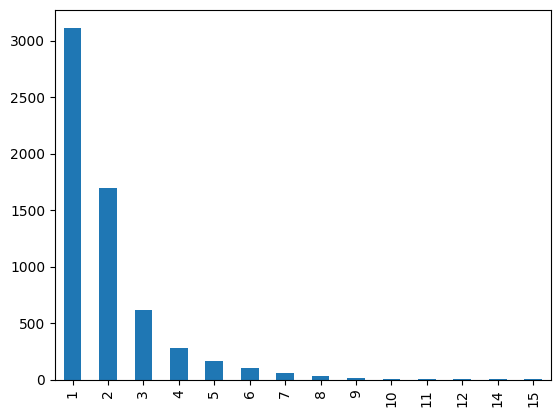

In [14]:
df['campaign'].value_counts().plot.bar()

en faisant une analyse visuelle on peut se dire que peut etre les personnes contactés de 3 a plus sont succeptibles d'être intéréssé par la campagne donc on va codifier cette variable en fonction de cela.

In [15]:
# Créer une nouvelle colonne "Durée_binaire"
df['campaignInteresser'] = ['Oui' if valeur >= 3 else 'Non' for valeur in df['campaign']]
#je supprime la variable duration

del df['campaign']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
#pour la variable pdays
print(df['pdays'].mean())
print(df['pdays'].median())


222.05334865397242
190.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


on peut utiliser la medianne pour dire pour un client qui a été appélé  depuis  190 jours serait plus apte a repondre favorablement à l'offre car ce domaine est beaucoup critiquer. donc on va codifier aussi cette variable en fonctiond de cela.

In [17]:
# Créer une nouvelle colonne "Durée_binaire"
df['pdaysInteresser'] = ['Oui' if valeur >= 190 else 'Non' for valeur in df['pdays']]
#je supprime la variable duration

del df['pdays']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
#pour la variable previous
print(df['previous'].mean())
print(df['previous'].median())

2.9482928430728825
2.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ici aussi on peut supposer qu'un client contacter plus de 2 fois serait plus succeptible d'être intéréssé par les campagnes marketing.

In [19]:
# Créer une nouvelle colonne "Durée_binaire"
df['previousInteresser'] = ['Oui' if valeur >= 2 else 'Non' for valeur in df['previous']]
#je supprime la variable duration

del df['previous']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
#pour la  variable balance
pd.qcut(df['balance'], q=4)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


24060       (606.5, 1794.5]
24064     (1794.5, 81204.0]
24077    (-1884.001, 172.0]
24127     (1794.5, 81204.0]
24151       (606.5, 1794.5]
                ...        
45194    (-1884.001, 172.0]
45195       (606.5, 1794.5]
45201        (172.0, 606.5]
45204     (1794.5, 81204.0]
45208     (1794.5, 81204.0]
Name: balance, Length: 6092, dtype: category
Categories (4, interval[float64, right]): [(-1884.001, 172.0] < (172.0, 606.5] < (606.5, 1794.5] <
                                           (1794.5, 81204.0]]

In [21]:
df['balance_Range'] = pd.qcut(df['balance'], q=4, labels=['<=147', '>147 <=634', '>634 <=1667', '>1667'])
del df['balance']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


b- (Sur 15 points) Transformer les données en format binaires (0/1 ou True/False) qui
est le format d’entrée requis pour les algorithmes Apriori et fpgrowth. Pour cela, des
techniques telles que « One Hot Encode » ou « get_dummies » (ou autres) peuvent
être utilisées.

In [22]:
df = pd.get_dummies(df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
print(df.columns)

Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_primary',
       'education_secondary', 'education_tertiary', 'default_no',
       'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes',
       'poutcome_failure', 'poutcome_success', 'y_no', 'y_yes',
       'Age_Range_<=33', 'Age_Range_>33 <=39', 'Age_Range_>30 <=49',
       'Age_Range_>49', 'Duree_Non', 'Duree_Oui', 'campaignInteresser_Non',
       'campaignInteresser_Oui', 'pdaysInteresser_Non', 'pdaysInteresser_Oui',
       'previousInteresser_Non', 'previousInteresser_Oui',
       'balance_Range_<=147', 'balance_Range_>147 <=634',
       'balance_Range_>634 <=1667', 'balance_Range_>1667'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2- (Sur 30 points) Implémenter les algorithmes Apriori et FP-Growth et extraire les
règles d’association tout en :
- Mentionnant le support minimum requis.
- Triant le résultat par confiance (tri descendant).
- Comparant le temps d’exécution des deux algorithmes.

In [24]:
#Apriori min support
min_support = 0.05
#Max lenght of apriori n-grams
max_len = 3
frequent_items = apriori(df, use_colnames=True, min_support=min_support, max_len=max_len + 1)
rules = association_rules(frequent_items, metric='lift', min_threshold=1)
rules.head(10).sort_values(by='confidence', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(job_admin.),(default_no),0.134603,0.993434,0.133782,0.993902,1.000472,0.000063,1.076822,0.000545
2,(job_admin.),(education_secondary),0.134603,0.530039,0.108667,0.807317,1.523127,0.037322,2.439036,0.396876
8,(job_admin.),(y_no),0.134603,0.754104,0.101609,0.754878,1.001027,0.000104,1.003159,0.001185
6,(job_admin.),(housing_yes),0.134603,0.622784,0.088641,0.658537,1.057408,0.004812,1.104704,0.062735
0,(job_admin.),(marital_single),0.134603,0.303677,0.050066,0.371951,1.224825,0.009190,1.108709,0.212107
3,(education_secondary),(job_admin.),0.530039,0.134603,0.108667,0.205017,1.523127,0.037322,1.088573,0.730818
1,(marital_single),(job_admin.),0.303677,0.134603,0.050066,0.164865,1.224825,0.009190,1.036236,0.263609
7,(housing_yes),(job_admin.),0.622784,0.134603,0.088641,0.142330,1.057408,0.004812,1.009010,0.143925
9,(y_no),(job_admin.),0.754104,0.134603,0.101609,0.134741,1.001027,0.000104,1.000160,0.004171
5,(default_no),(job_admin.),0.993434,0.134603,0.133782,0.134666,1.000472,0.000063,1.000073,0.071779


In [25]:
frequent_item = fpgrowth(df, use_colnames=True, min_support=min_support, max_len=max_len + 1)
rules = association_rules(frequent_items, metric='lift', min_threshold=1)
rules.head(10).sort_values(by='confidence', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(job_admin.),(default_no),0.134603,0.993434,0.133782,0.993902,1.000472,0.000063,1.076822,0.000545
2,(job_admin.),(education_secondary),0.134603,0.530039,0.108667,0.807317,1.523127,0.037322,2.439036,0.396876
8,(job_admin.),(y_no),0.134603,0.754104,0.101609,0.754878,1.001027,0.000104,1.003159,0.001185
6,(job_admin.),(housing_yes),0.134603,0.622784,0.088641,0.658537,1.057408,0.004812,1.104704,0.062735
0,(job_admin.),(marital_single),0.134603,0.303677,0.050066,0.371951,1.224825,0.009190,1.108709,0.212107
3,(education_secondary),(job_admin.),0.530039,0.134603,0.108667,0.205017,1.523127,0.037322,1.088573,0.730818
1,(marital_single),(job_admin.),0.303677,0.134603,0.050066,0.164865,1.224825,0.009190,1.036236,0.263609
7,(housing_yes),(job_admin.),0.622784,0.134603,0.088641,0.142330,1.057408,0.004812,1.009010,0.143925
9,(y_no),(job_admin.),0.754104,0.134603,0.101609,0.134741,1.001027,0.000104,1.000160,0.004171
5,(default_no),(job_admin.),0.993434,0.134603,0.133782,0.134666,1.000472,0.000063,1.000073,0.071779


In [26]:
%timeit -n 100 -r 10 fpgrowth(df, min_support=0.5)
# il y a eu un temps de 1min 9s

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py

68.4 ms ± 1.92 ms per loop (mean ± std. dev. of 10 runs, 100 loops each)


In [27]:
%timeit -n 100 -r 10 apriori(df, min_support=0.5)
# il ya un temps de  8s

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py

8.71 ms ± 1.24 ms per loop (mean ± std. dev. of 10 runs, 100 loops each)


/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in wors

3- (Sur 20 points) Reprendre la question 2 et générer uniquement les règles
d’association qui ont comme conséquence la variable cible y : souscription à un dépôt
à terme ou non.


In [33]:
#Apriori min support
min_support = 0.1
#Max lenght of apriori n-grams
max_len = 3
frequent_items = apriori(df, use_colnames=True, min_support=min_support, max_len=max_len + 1)
rules = association_rules(frequent_items, metric='lift', min_threshold=1)
target = '{\'y_no\'}'
results_souscription_no = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_souscription_no.head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4607,"(job_blue-collar, poutcome_failure, Duree_Non)",(y_no),0.115726,0.754104,0.113756,0.982979,1.303506,0.026487,14.446405,0.263310
14931,"(housing_yes, poutcome_failure, Duree_Non)",(y_no),0.387886,0.754104,0.376395,0.970377,1.286795,0.083889,8.300755,0.364107
4503,"(job_blue-collar, housing_yes, Duree_Non)",(y_no),0.108011,0.754104,0.104728,0.969605,1.285771,0.023276,8.089987,0.249170
15566,"(housing_yes, pdaysInteresser_Oui, Duree_Non)",(y_no),0.271996,0.754104,0.263132,0.967411,1.282862,0.058019,7.545372,0.302873
17250,"(poutcome_failure, balance_Range_<=147, Duree_...",(y_no),0.145601,0.754104,0.140676,0.966178,1.281227,0.030878,7.270333,0.256904
17210,"(poutcome_failure, pdaysInteresser_Oui, Duree_...",(y_no),0.308601,0.754104,0.296619,0.961170,1.274586,0.063901,6.332671,0.311588
17101,"(Age_Range_>30 <=49, poutcome_failure, Duree_Non)",(y_no),0.143631,0.754104,0.137722,0.958857,1.271519,0.029409,5.976645,0.249354
17186,"(campaignInteresser_Oui, Duree_Non, poutcome_f...",(y_no),0.122948,0.754104,0.117859,0.958611,1.271193,0.025144,5.941171,0.243244
15579,"(housing_yes, previousInteresser_Non, Duree_Non)",(y_no),0.149212,0.754104,0.142974,0.958196,1.270642,0.030453,5.882097,0.250352
17223,"(previousInteresser_Non, poutcome_failure, Dur...",(y_no),0.187951,0.754104,0.179580,0.955459,1.267012,0.037845,5.520612,0.259518


In [29]:
#Apriori min support
min_support = 0.1
#Max lenght of apriori n-grams
max_len = 3
frequent_items = apriori(df, use_colnames=True, min_support=min_support, max_len=max_len + 1)
rules = association_rules(frequent_items, metric='lift', min_threshold=1)
target = '{\'y_yes\'}'
results_souscription_no = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_souscription_no.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
14068,"(poutcome_success, housing_no, loan_no)",(y_yes),0.152988,0.245896,0.107682,0.703863,2.862437,0.070063,2.546466,0.768167
10747,"(poutcome_success, housing_no, default_no)",(y_yes),0.158897,0.245896,0.111622,0.702479,2.856812,0.072550,2.534626,0.772746
2676,"(poutcome_success, housing_no)",(y_yes),0.159061,0.245896,0.111622,0.701754,2.853864,0.072509,2.528465,0.772467
17692,"(poutcome_success, campaignInteresser_Non, pda...",(y_yes),0.149376,0.245896,0.100295,0.671429,2.730536,0.063564,2.295098,0.745067
16346,"(poutcome_success, pdaysInteresser_Non, loan_no)",(y_yes),0.173178,0.245896,0.116218,0.671090,2.729159,0.073634,2.292736,0.766292
13139,"(poutcome_success, pdaysInteresser_Non, defaul...",(y_yes),0.181714,0.245896,0.120814,0.664860,2.703823,0.076131,2.250115,0.770089
3718,"(poutcome_success, pdaysInteresser_Non)",(y_yes),0.181878,0.245896,0.120814,0.664260,2.701383,0.076091,2.246094,0.769835
16332,"(poutcome_success, campaignInteresser_Non, loa...",(y_yes),0.179744,0.245896,0.119337,0.663927,2.700029,0.075138,2.243868,0.767606
16360,"(previousInteresser_Oui, poutcome_success, loa...",(y_yes),0.151346,0.245896,0.100131,0.661605,2.690587,0.062916,2.228473,0.740389
13125,"(poutcome_success, campaignInteresser_Non, def...",(y_yes),0.189757,0.245896,0.125082,0.659170,2.680682,0.078422,2.212548,0.773793


4- (Sur 20 points) Interpréter les antécédents des règles générées en question 3 pour
analyser les caractéristiques principales fréquentes chez un client qui s’inscrit à un
dépôt à terme ou pas chez cette institution bancaire portugaise.

**Les résultats indiquent que les clients suivants sont moins susceptibles de souscrire un dépôt à terme :**
**voici pour les 3 clients les moins probales.**
*Clients ouvriers (job_blue-collar) ayant eu un échec précédent (poutcome_failure) et choisissant une durée autre que non spécifiée (Duree_Non) pour un produit quelconque.*
*Clients ayant un emploi stable (housing_yes) et ayant eu un échec précédent (poutcome_failure) choisissant une durée autre que non spécifiée (Duree_Non) pour un produit quelconque.*
*Clients ouvriers (job_blue-collar) ayant un emploi stable (housing_yes) et choisissant une durée autre que non spécifiée (Duree_Non) pour un produit quelconque. *

En résumé, les clients ayant déjà connu un échec (poutcome_failure) et choisissant une durée autre que non spécifiée (Duree_Non) pour un produit quelconque sont moins susceptibles de souscrire un dépôt à terme, en particulier s'ils sont ouvriers (job_blue-collar) ou propriétaires (housing_yes).

**À l'inverse, les clients suivants sont plus susceptibles de souscrire un dépôt à terme :**

*Clients en situation financière saine (poutcome_success) n'ayant pas de prêt (loan_no) et ne possédant pas de logement (housing_no).*
*Similaire au cas précédent, mais n'ayant pas de défaut de paiement (default_no) sur des produits antérieurs.*
*Clients en situation financière saine (poutcome_success) n'ayant pas de logement (housing_no).*
Ces résultats suggèrent que les clients financièrement stables (poutcome_success), sans prêt en cours (loan_no), sans antécédent de défaut de paiement (default_no), et n'étant pas propriétaires (housing_no) sont plus enclins à souscrire un dépôt à terme.

  [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology.
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.